# Day - 15
# Date - 10 June 2019
# Outcomes - 
>*  Understanding Machine Learning concepts - SLR

In [1]:
import pandas as pd
import numpy as np
import seaborn as seb
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
from sklearn.linear_model import LinearRegression

In [2]:
# load data
area_data = pd.read_csv('area.csv')

# removing unnamed column
area_data = area_data.loc[:, ~area_data.columns.str.contains('^Unnamed')]
area_data.to_csv('area.csv', index = False)
area_data

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


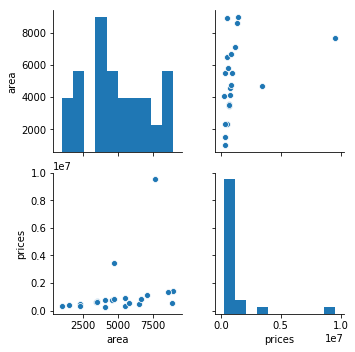

In [3]:
# plot seaborn - seb
seb.pairplot(area_data)

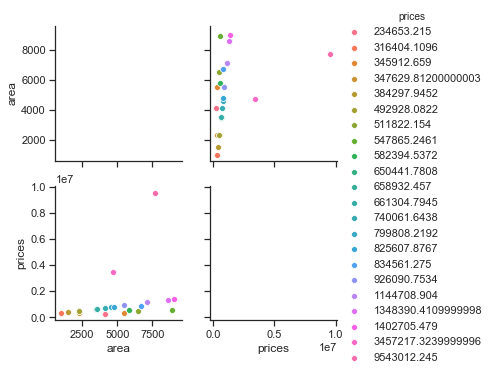

In [18]:
seb.set(style = 'ticks')

seb.pairplot(area_data, hue = 'prices')

In [5]:
# fit regression model - Ordinary Least Squares
model = smf.ols('prices ~ area', data = area_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 prices   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.810
Date:                Tue, 11 Jun 2019   Prob (F-statistic):              0.108
Time:                        14:12:09   Log-Likelihood:                -363.63
No. Observations:                  23   AIC:                             731.3
Df Residuals:                      21   BIC:                             733.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.149e+05   9.21e+05     -0.233      0.818   -2.13e+06     1.7e+06
area         283.8428    169.316      1.676      0.108     -68.269     635.955
==============================================================================
Omnibus:                       44.287   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.886
Skew:                           3.367   Prob(JB):                     1.29e-37
Kurtosis:                      14.486   Cond. No.                     1.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
x = area_data.iloc[:,:1]  # input variable
y = area_data.iloc[:,1]   # output variable

# split the data
xtest, xtrain, ytest, ytrain = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(xtest.shape)
print(xtrain.shape)
print(ytest.shape)
print(ytrain.shape, end = '\n\n')
print(xtest, end = '\n\n')
print(xtrain, end = '\n\n')
print(ytest, end = '\n\n')
print(ytrain, end = '\n\n')

(18, 1)
(5, 1)
(18,)
(5,)

    area
1   1500
13  6500
22  8900
16  3500
8   4750
6   5490
17  4100
4   4120
2   2300
5   4560
18  6700
9   2300
7   3460
19  5800
3   3540
0   1000
15  2300
12  7100

    area
11  8600
10  9000
21  7700
14  5500
20  4700

1     3.842979e+05
13    5.118222e+05
22    5.478652e+05
16    6.589325e+05
8     8.256079e+05
6     9.260908e+05
17    2.346532e+05
4     7.400616e+05
2     4.929281e+05
5     7.998082e+05
18    8.345613e+05
9     4.929281e+05
7     6.504418e+05
19    5.823945e+05
3     6.613048e+05
0     3.164041e+05
15    3.476298e+05
12    1.144709e+06
Name: prices, dtype: float64

11    1348390.411
10    1402705.479
21    9543012.245
14     345912.659
20    3457217.324
Name: prices, dtype: float64



In [7]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain) # put training variables into regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
regressor.intercept_

2456343.3632588717

In [9]:
regressor.coef_

array([107.47947329])

In [10]:
ypred = regressor.predict(xtest)  # predict output using input test
ypred

array([2617562.5731901 , 3154959.93962751, 3412910.67551747,
       2832521.51976506, 2966870.86137441, 3046405.67160715,
       2897009.20373755, 2899158.7932033 , 2703546.15182008,
       2946449.76144979, 3176455.83428501, 2703546.15182008,
       2828222.34083356, 3079724.30832627, 2836820.69869656,
       2563822.83654635, 2703546.15182008, 3219447.6236    ])

In [11]:
# compare predicted output values with the original output test values
ypred == ytest

1     False
13    False
22    False
16    False
8     False
6     False
17    False
4     False
2     False
5     False
18    False
9     False
7     False
19    False
3     False
0     False
15    False
12    False
Name: prices, dtype: bool

In [12]:
# check the mean differrence
print(np.mean(ypred))
print(np.mean(ytest))
print('difference : ', abs(np.mean(ypred)- np.mean(ytest)))

2921610.0609566853
619580.0493277779
difference :  2302030.011628907


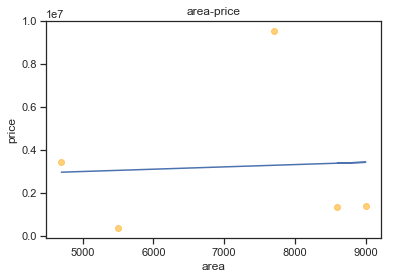

In [13]:
# plot graphs for the regression process
plt.scatter(xtrain, ytrain, color = 'orange', alpha = 0.5)
plt.plot(xtrain, regressor.predict(xtrain))
plt.title('area-price')
plt.xlabel('area')
plt.ylabel('price')
plt.show() # SLRL is a stratight line whih is trying to be closest to the real points

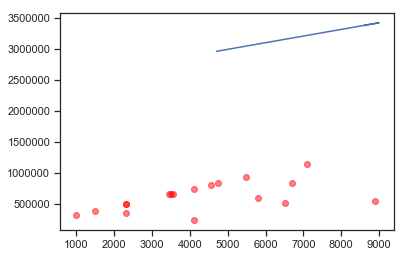

In [14]:
plt.plot(xtrain, regressor.predict(xtrain))
plt.scatter(xtest, ytest, color = 'red', alpha = 0.5)
plt.show()

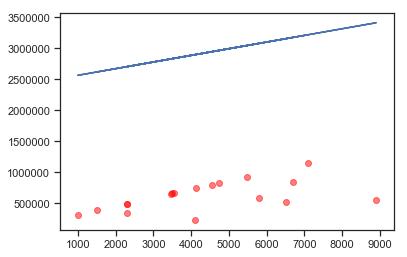

In [15]:
plt.plot(xtest, regressor.predict(xtest))
plt.scatter(xtest, ytest, color = 'red', alpha = 0.5)
plt.show()

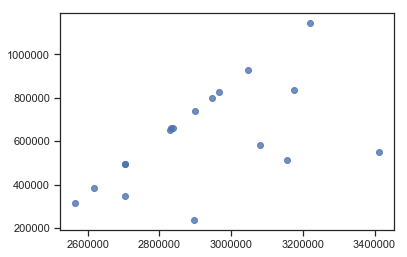

In [16]:
plt.scatter(ypred, ytest, alpha = 0.8)
plt.show()